In [97]:
import glob
from tqdm import tqdm
import pickle
import numpy as np
import jax
import bayes3d as b
import subprocess
paths = "/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/pickled_data/*pkl"
files = sorted(glob.glob(paths))
import sys
from genjax._src.core.pytree.utilities import *
from genjax.generative_functions.distributions import ExactDensity
import jax.tree_util as jtu
from genjax._src.core.transforms.incremental import NoChange, UnknownChange, Diff
import genjax
from tensorflow_probability.substrates import jax as tfp
sys.path.append("../")
from viz import *
from utils import *
console = genjax.pretty()
gt_bin = np.array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [4]:
for file in tqdm(files[30:45]):
    scene_name = file.split("/")[-1][:-4]
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_3/results_{scene_name}.pkl", 'rb') as file:
        results = pickle.load(file)
    print(scene_name)
    display(display_video(results["viz"]))

  0%|          | 0/15 [00:00<?, ?it/s]

passive_physics_validation_object_permanence_0001_01


<IPython.core.display.HTML object>

  7%|▋         | 1/15 [00:06<01:32,  6.59s/it]

passive_physics_validation_object_permanence_0001_02


<IPython.core.display.HTML object>

 13%|█▎        | 2/15 [00:12<01:17,  5.95s/it]

passive_physics_validation_object_permanence_0001_03


<IPython.core.display.HTML object>

 20%|██        | 3/15 [00:17<01:09,  5.78s/it]

passive_physics_validation_object_permanence_0001_07


<IPython.core.display.HTML object>

 27%|██▋       | 4/15 [00:23<01:02,  5.68s/it]

passive_physics_validation_object_permanence_0001_08


<IPython.core.display.HTML object>

 33%|███▎      | 5/15 [00:28<00:56,  5.62s/it]

passive_physics_validation_object_permanence_0001_09


<IPython.core.display.HTML object>

 40%|████      | 6/15 [00:34<00:50,  5.57s/it]

passive_physics_validation_object_permanence_0001_13


<IPython.core.display.HTML object>

 47%|████▋     | 7/15 [00:39<00:44,  5.54s/it]

passive_physics_validation_object_permanence_0001_14


<IPython.core.display.HTML object>

 53%|█████▎    | 8/15 [00:45<00:38,  5.52s/it]

passive_physics_validation_object_permanence_0001_15


<IPython.core.display.HTML object>

 60%|██████    | 9/15 [00:50<00:33,  5.54s/it]

passive_physics_validation_object_permanence_0001_19


<IPython.core.display.HTML object>

 67%|██████▋   | 10/15 [00:56<00:27,  5.54s/it]

passive_physics_validation_object_permanence_0001_20


<IPython.core.display.HTML object>

 73%|███████▎  | 11/15 [01:01<00:22,  5.54s/it]

passive_physics_validation_object_permanence_0001_23


<IPython.core.display.HTML object>

 80%|████████  | 12/15 [01:07<00:16,  5.49s/it]

passive_physics_validation_object_permanence_0001_24


<IPython.core.display.HTML object>

 87%|████████▋ | 13/15 [01:13<00:11,  5.79s/it]

passive_physics_validation_object_permanence_0001_27


<IPython.core.display.HTML object>

 93%|█████████▎| 14/15 [01:19<00:05,  5.75s/it]

passive_physics_validation_object_permanence_0001_28


<IPython.core.display.HTML object>

100%|██████████| 15/15 [01:24<00:00,  5.62s/it]


In [ ]:
def load_path(scene_name):
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_2/results_{scene_name}.pkl", 'rb') as file:
        return pickle.load(file)

In [183]:
with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_3/results_passive_physics_validation_object_permanence_0001_01.pkl", 'rb') as file:
    results = pickle.load(file)
display_video(results["viz"])

<IPython.core.display.HTML object>

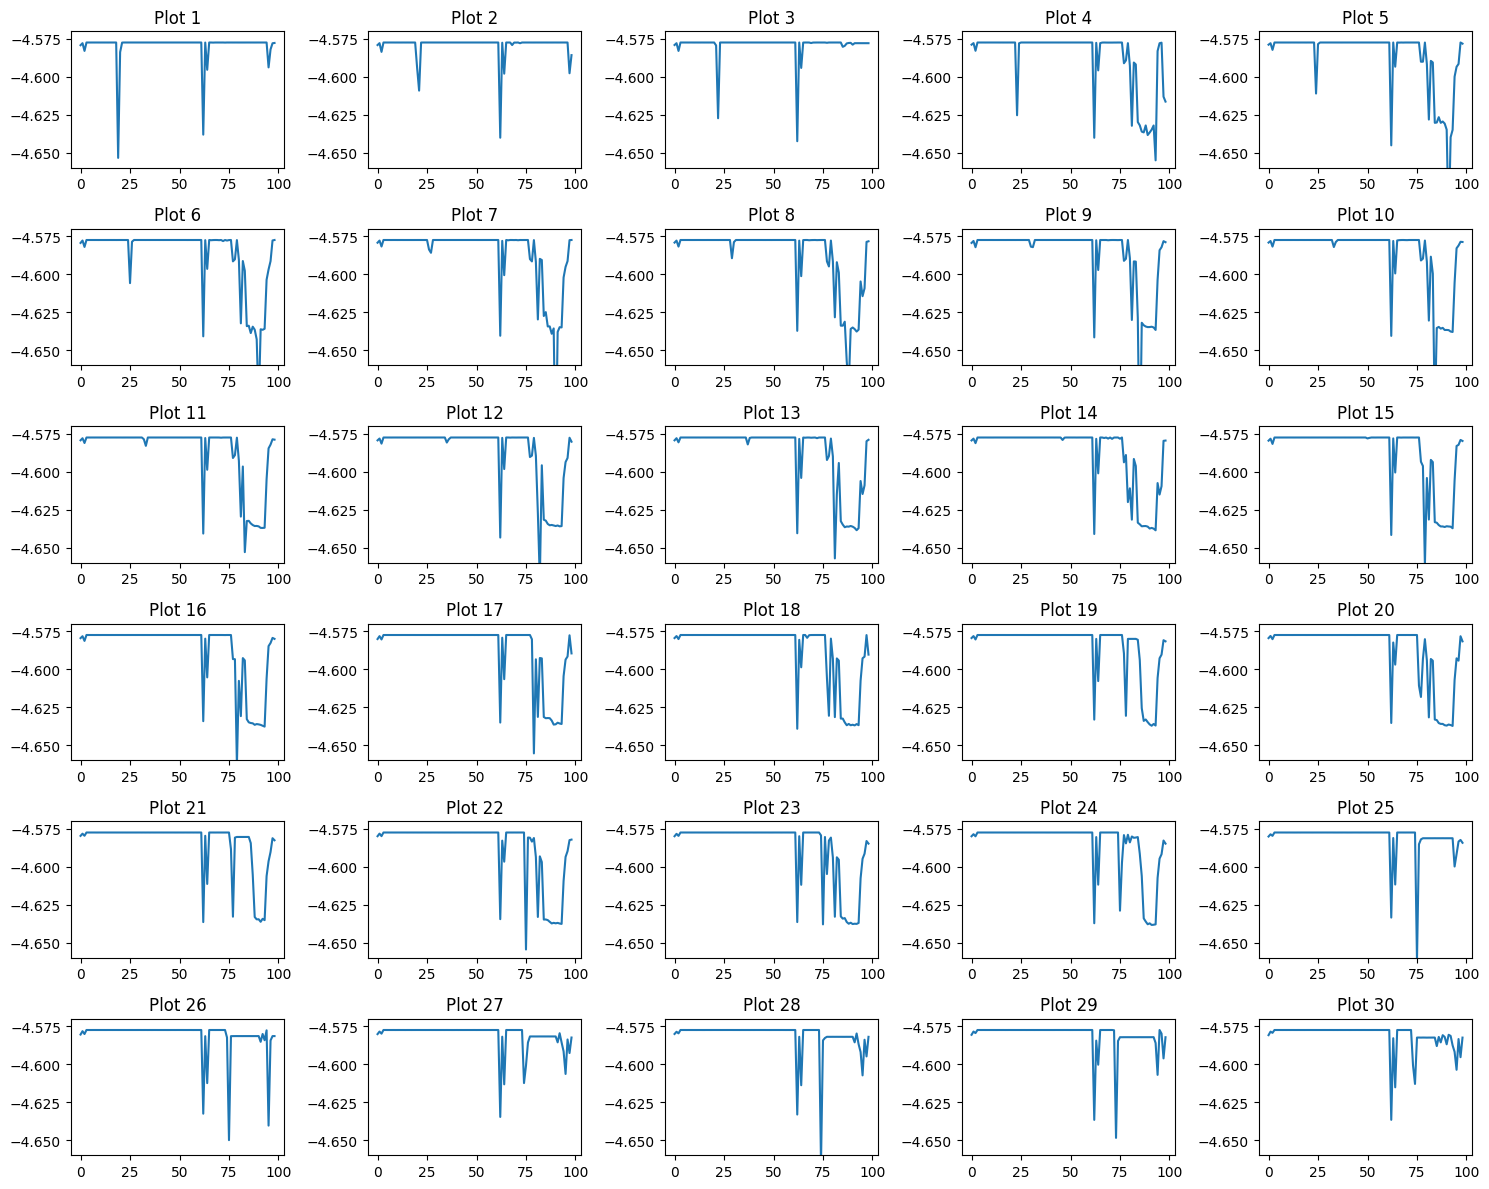

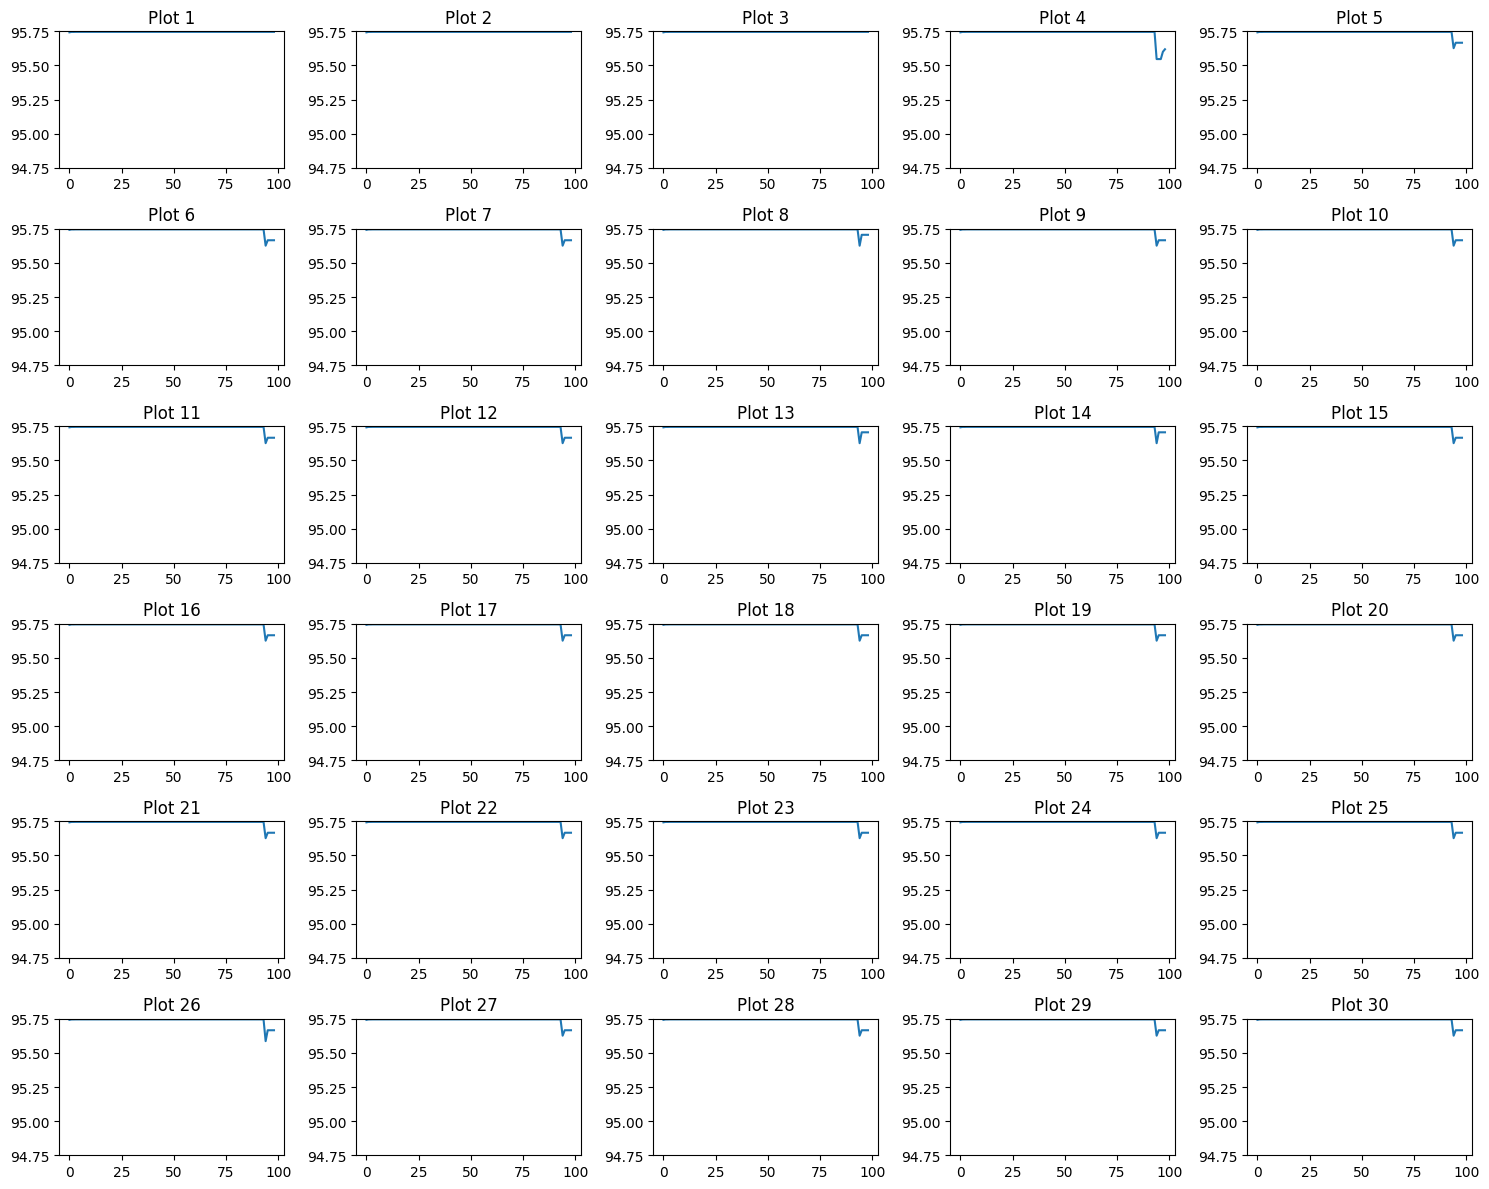

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline

data = results["phy_ll"][0][3:]

fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Set global min and max for y-axis
ymin, ymax = np.min(data), np.max(data)

for i in range(30):
    ax = axes[i//5, i%5]
    ax.plot(data[3:, i])
    ax.set_ylim([-4.66, -4.57])  # Set the same y-axis limits for all plots
    ax.set_title(f"Plot {i+1}")
    # ax.set_yscale("log")

plt.tight_layout()
plt.show()


data = results["rend_ll"][3:]

fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Set global min and max for y-axis
ymin, ymax = np.min(data), np.max(data)

for i in range(30):
    ax = axes[i//5, i%5]
    ax.plot(data[3:, i])
    ax.set_ylim([94.75, 95.75])  # Set the same y-axis limits for all plots
    ax.set_title(f"Plot {i+1}")
    # ax.set_yscale("log")

plt.tight_layout()
plt.show()

In [ ]:
plausible_scenes = [files[i].split("/")[-1][:-4] for i in range(62) if gt_bin[i] == 1]
implausible_scenes = [files[i].split("/")[-1][:-4] for i in range(62) if gt_bin[i] == 0]

plausible_scenes_perm = [x for x in plausible_scenes if "permanence" in x]
implausible_scenes_perm = [x for x in implausible_scenes if "permanence" in x]

plausible_perm_results = [load_path(x) for x in plausible_scenes_perm]
implausible_perm_results = [load_path(x) for x in implausible_scenes_perm]

In [ ]:
plausible_rend_markers = [np.min(np.max(x["rend_ll"][3:,:],axis=1)) for x in plausible_perm_results]
implausible_rend_markers = [np.min(np.max(x["rend_ll"][3:,:],axis=1)) for x in implausible_perm_results]

In [ ]:
plausible_rend_markers

In [ ]:
implausible_rend_markers

In [ ]:
plausible_phy_markers = [np.min(np.max(x["phy_ll"][0][3:,:],axis=1)) for x in plausible_perm_results]
implausible_phy_markers = [np.min(np.max(x["phy_ll"][0][3:,:],axis=1)) for x in implausible_perm_results]

In [ ]:
plausible_phy_markers

In [ ]:
implausible_phy_markers

In [ ]:
# Create a scatter plot for the first cluster (in blue)
plt.scatter(plausible_phy_markers, plausible_rend_markers, c='blue', label='Plausible')

# Create a scatter plot for the second cluster (in red)
plt.scatter(implausible_phy_markers, implausible_rend_markers, c='red', label='Implausible')

# Add labels and a title
plt.xlabel('Physics LL')
plt.ylabel('Rend LL')
plt.title('Cluster Plot')

# Add a legend to distinguish between clusters
plt.legend()

# Display the plot
plt.show()

In [ ]:
implausible_scenes_perm

In [162]:
params = (jnp.array([1e-0,1e-0,5e-1]), 5e-1)
# params = (1e+20, 0)
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0,0,0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.005,0.0,0.0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.0,1,0.0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.0,0.0,1]), *params))
# 0.02 ll diff for movement of away

Array(-4.577364, dtype=float32)

Array(-4.5773764, dtype=float32)

Array(-5.077364, dtype=float32)

Array(-6.5773644, dtype=float32)

In [74]:
(-7.79624 - -7.81624)

0.019999999999999574

In [63]:
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([1,0,0]), *(5e-0,5e-1)))

Array(-10.118825, dtype=float32)

In [46]:
(10-9.99) * 1e5

999.9999999999786

In [9]:
params = [1,1,1]
display(genjax.tfp_mv_normal_diag.logpdf([0,0,0],[0,0,0],params))
display(genjax.tfp_mv_normal_diag.logpdf([0.1,0.1,0.0],[0,0,0],params))
display(genjax.tfp_mv_normal_diag.logpdf([0.0,0.1,0.1],[0,0,0],params))


Array(-2.7568154, dtype=float32)

Array(-2.7668157, dtype=float32)

Array(-2.7668157, dtype=float32)

In [81]:
.quantile

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 genjax.tfp_normal(key,0,1).quantile                                                          │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'DeferredGenerativeFunctionCall' object has no attribute 'quantile'

In [51]:
jnp.sort(jnp.array([3,6,4,4,3,5,7,8,]))

Array([3, 3, 4, 4, 5, 6, 7, 8], dtype=int32)

In [171]:
qs = jnp.linspace(0.03,0.9,30)
tfp.distributions.Normal(0.02,0.04).quantile(qs)


Array([-0.05523175, -0.04219094, -0.0336302 , -0.02699947, -0.02145734,
       -0.0166146 , -0.01225685, -0.0082521 , -0.00451252, -0.00097602,
        0.00240347,  0.00566165,  0.00882724,  0.01192426,  0.01497354,
        0.01799386,  0.02100275,  0.02401735,  0.02705497,  0.03013388,
        0.03327413,  0.03649852,  0.03983401,  0.04331365,  0.04697959,
        0.05088773,  0.05511585,  0.05977831,  0.06505564,  0.07126205],      dtype=float32)

In [177]:
2400*jax.scipy.stats.norm.pdf(
        np.array([0.]),
        loc=0.0, 
        scale=0.3
    ) / 9575

Array([0.3333199], dtype=float32)

In [182]:
0.01 / (1/3.3)

0.033

In [128]:
3.9894223 * (2400-6) *0.01


95.506769862